## Ex: 5.2 Compute Correlations

- **Objective**: Compute the correlations among variables in the World Happiness Report data.

- **Requires data file: `WHR2018Chapter2OnlineData.xls`**

- **Demonstrates**:
    - `corr()` method of pandas DataFrame
    - `sns.heatmap()` function of seaborn
    - `sns.regplot()` function of seaborn
    - `sns.jointplot()` function of seaborn
    - `Matplotlib’s 3D scatter plot`

---

As before, we'll repeat here some of the code developed in a previous exercise so that we can continue to work with data in this exercise. Execute the next few code cells to load and reconfigure the data. Rather than examining the full dataset, we will just examine the data from 2015-2017, which we will store in a dataframe named ```df1517```.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [16]:
dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [17]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
df1517 = df[df.year.isin(range(2015,2018))]
df1517.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
7,Afghanistan,2015,3.98,0.55,0.34,7.47,0.53,51.69,0.39,0.09,0.88
8,Afghanistan,2016,4.22,0.56,0.35,7.46,0.56,52.02,0.52,0.06,0.79
9,Afghanistan,2017,2.66,0.50,0.37,7.46,0.49,52.34,0.43,-0.11,0.95
17,Albania,2015,4.61,0.69,0.35,9.30,0.64,68.69,0.70,-0.09,0.88
18,Albania,2016,4.51,0.68,0.32,9.34,0.64,68.87,0.73,-0.02,0.90


### Step 1

We previously used pairwise scatterplots to examine relationships among components of the WHR dataset, and noted based on visual inspection some patterns of correlation and anticorrelation.  We can quantify those patterns by computing pairwise correlations among all the WHR variables that we are examining.

Pandas provides the ```corr``` method on dataframes that computes pairwise correlations among all columns.  With no optional arguments, the method computes Pearson correlations among all pairs of columns.

In the code cell below, write and evaluate the expression, ```df1517.corr(numeric_only=True)``` that computes all the pairwise correlations of the dataframe ```df1517```, and assign the result to the variable ```correlations```.  

Examine the ```correlations``` dataframe after it is computed.  Note that the row and column labels are identical, such that any entry in the resulting matrix reflects the correlation between the row-column pair.  And since correlations are symmetric, i.e., corr(x,y) = corr(y,x), the matrix of correlation values is also symmetric about the diagonal.

In [18]:
correlations = df1517.corr(numeric_only=True)
correlations.head(10)

,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
year,1.00,0.03,-0.03,0.06,0.02,0.03,0.02,0.09,-0.07,-0.00
Happiness,0.03,1.00,0.54,-0.46,0.80,0.74,0.76,0.54,0.15,-0.44
Positive,-0.03,0.54,1.00,-0.43,0.33,0.46,0.31,0.62,0.29,-0.32
Negative,0.06,-0.46,-0.43,1.00,-0.41,-0.58,-0.44,-0.35,-0.09,0.34
LogGDP,0.02,0.80,0.33,-0.41,1.00,0.71,0.86,0.36,-0.02,-0.38
Support,0.03,0.74,0.46,-0.58,0.71,1.00,0.67,0.38,0.07,-0.25
Life,0.02,0.76,0.31,-0.44,0.86,0.67,1.00,0.33,0.01,-0.33
Freedom,0.09,0.54,0.62,-0.35,0.36,0.38,0.33,1.00,0.31,-0.49
Generosity,-0.07,0.15,0.29,-0.09,-0.02,0.07,0.01,0.31,1.00,-0.35
Corruption,-0.00,-0.44,-0.32,0.34,-0.38,-0.25,-0.33,-0.49,-0.35,1.00


### Step 2

Visualization of the correlation matrix is useful with a heatmap.  Seaborn (sns) provides a useful heatmap function.

Prior to making the heatmap, create a matplotlib figure that is bigger than the default size, since the heatmap will otherwise be a bit difficult to read.  
- To do so, use the command ```plt.figure(figsize=(8,6))``` in the first line of the code cell below.  By creating the larger figure first, seaborn (which uses matplotlib for plotting) will insert the heatmap into the existing figure rather than creating a new one.

- Next, make a call with the `sns.heatmap` function to display your computed correlation matrix.  Pass in the ```correlations``` variable, and the additional argument ```annot=True``` so that the numerical values of each entry are displayed on top of the heatmap, as well as the argument ```square=True``` so that it will make a square aspect ratio.  

- Note: It is possible that your heatmap might get clipped off at the top and the bottom, because of recent changes made to matplotlib.  If you find that is the case, you should be able to fix this by first assigning the output of the heatmap function to a variable named ```ax``` (short for Axes), and then resetting the y-axis limits with the following command: ```ax.set_ylim(len(correlations), -0.5)```

<Axes: >

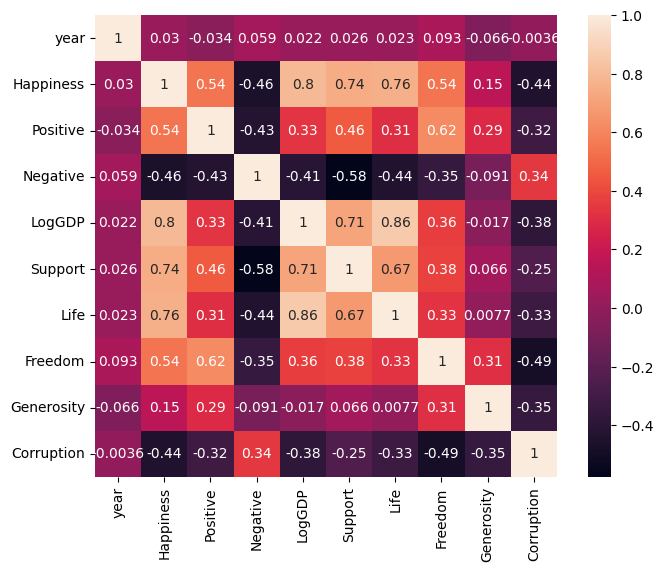

In [ ]:
# Step 2
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, square=True)

Note the patterns of positive and negative correlation.  We noticed previously that LogGDP, Support, and Life all showed reasonably strong positive correlation with Happiness, and that Corruption showed negative correlation.  That is explicitly shown here.  

### Step 3

Seaborn provides a function called ```regplot``` (short for regression plot) that both presents a scatterplot of a pair of variables and estimates a linear regression of the data.  

It is a method that estimates a relationship between two variables by fitting a straight line to data points relating those variables.  By performing a linear regression, we can estimate the line that best fits the data points.

The Seaborn ```regplot``` function bundles together a scatterplot of two data variables with an estimate of the best fitting line, producing a figure showing both the data points and the regression line.  

We have noted previously that Happiness and LogGDP show somewhat strong positive correlation.

Use the ```regplot``` function in Seaborn to perform a plot of ```'Happiness' (on the y-axis)``` vs. ```'LogGDP' (on the x-axis)```, using the data in ```df1517```.  Note the linear fit to the data indicated by the line, and the shaded area around the line that indicates the confidence interval. 

<Axes: xlabel='LogGDP', ylabel='Happiness'>

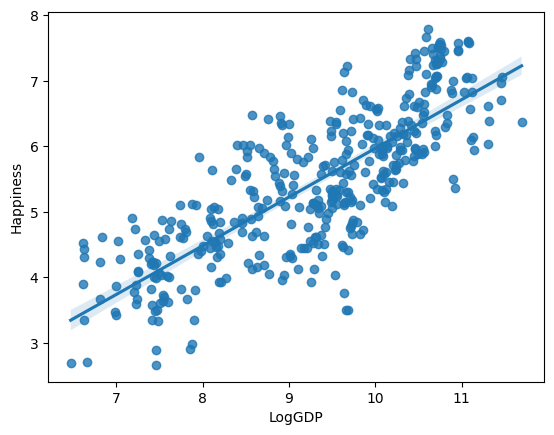

In [20]:
# Step 3
sns.regplot(x='LogGDP', y='Happiness', data=df1517)

### Step 4

Perform another `regplot` to examine the relationship between 'Happiness' on the y-axis and 'Generosity' on the x-axis.  
- You should note now that while there is a weak positive correlation between these quantities, the confidence interval is not as tight as in the previous plot, indicating that there is greater uncertainty in the slope and intercept of the best-fit line.

<Axes: xlabel='Generosity', ylabel='Happiness'>

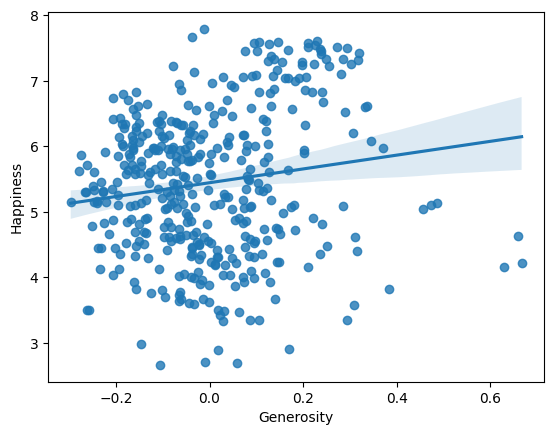

In [21]:
# Step 4
sns.regplot(x='Generosity', y='Happiness', data=df1517)

### Step 5

Seaborn also provides a function called `jointplot` that creates a multi-panel figure showing both the bivariate relationship between two variables as well as their individual distributions. Read the [documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html) for that function to see the different options.

By setting the `kind='reg'` parameter, the jointplot function combines a scatterplot with a regression line (just like regplot) in the central plot area, and adds histograms of each variable along the top and right sides to show their distributions.

This allows you to see not only how the two variables relate to each other, but also how each variable is distributed individually.

Use the `jointplot` function to create a plot of `'Happiness' (on the y-axis)` vs. `'LogGDP' (on the x-axis)`, using the data in `df1517`. The central plot should show a regression line fitted to the data, while the shaded area represents the confidence interval. The top and right margins should show histograms of the individual distributions of LogGDP and Happiness.

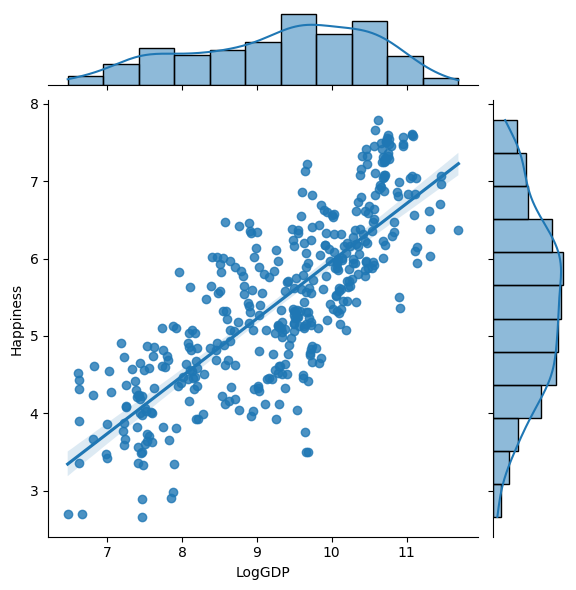

In [22]:
# Step 5 
sns.jointplot(x='LogGDP', y='Happiness', data=df1517, kind='reg')

### Step 6

To explore the relationship between three continuous variables — LogGDP, Happiness, and Generosity, we can use `Matplotlib’s 3D scatter plot`.

- To do so, use the command ```plt.figure(figsize=(8,6))``` in the first line of the code cell below.

- Add a subplot to the figure, but make sure to set the projection argument to '3d' so that it creates a 3D axes.

<pre>
axes = fig.add_subplot(projection='3d')
</pre>

- Next, use the `scatter` method of the 3D axes to create a scatter plot of the three variables. The `x-axis should represent LogGDP`, the `y-axis should represent Happiness`, and the `z-axis should represent Generosity`. Set the color of each point based on the country’s Happiness score.

<pre>
scatter_plot = axes.scatter(df1517['LogGDP'], df1517['Happiness'], df1517['Generosity'], c=df1517['Happiness'])
</pre>

- Next, set the title and axis labels for the 3D scatter plot. Use the `set` method of the axes object to set the title and labels.

<pre>
axes.set(title='3D Scatter Plot of LogGDP, Happiness, and Generosity', 
       xlabel='Log of GDP', ylabel='Happiness Score', zlabel='Generosity')
</pre>

- Finally, use the `colorbar` method of the figure to add a color bar to the plot. This will help interpret the colors of the points in relation to the Happiness score. Read the [documentation](https://matplotlib.org/stable/api/colorbar_api.html#module-matplotlib.colorbar) for the `colorbar` method to see the supported arguments.

<pre>
fig.colorbar(scatter_plot, ax=axes, pad=0.1).set_label('Happiness Score')
plt.show()
</pre>

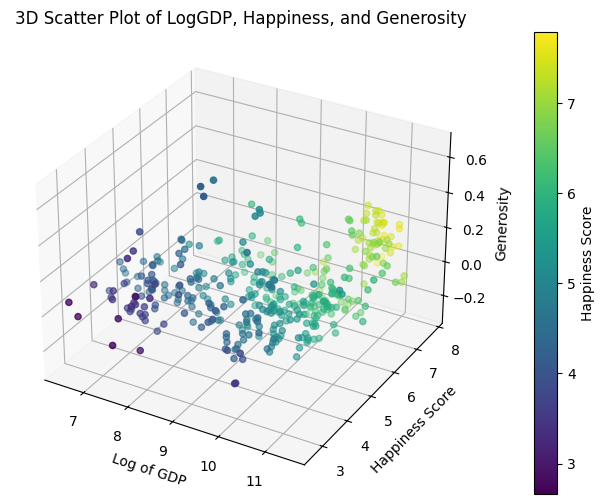

In [29]:
# Step 6
fig = plt.figure(figsize=(8, 6))  # Define the figure
axes = fig.add_subplot(projection='3d')  # Add a 3D subplot
scatter_plot = axes.scatter(df1517['LogGDP'], df1517['Happiness'], df1517['Generosity'], c=df1517['Happiness'])
axes.set(title='3D Scatter Plot of LogGDP, Happiness, and Generosity', xlabel='Log of GDP', ylabel='Happiness Score', zlabel='Generosity')
fig.colorbar(scatter_plot, ax=axes, pad=0.1).set_label('Happiness Score')  # Correctly call set_label
plt.show()